# Pip

In [22]:
!pip install pandas 
!pip install sklearn
!pip install matplotlib
!pip install seaborn

# Imports

In [3]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Atrributes 

In [4]:
# age = age of the individual
# sex = gender
# cp = chest pain
# trestbps = resting blood pressure
# chol = cholestrol
# fbs = fasting blood sugar
#----------------------------------------------------------------------------
# restecg = Resting ECG : displays resting electrocardiographic results 0 = |
# normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy |
#----------------------------------------------------------------------------
# thalach = Max heart rate achieved : displays the max heart rate achieved by an individual.
# xang = Exercise induced angina : 1 = yes 0 = no
# oldpeak = ST depression induced by exercise relative to rest: displays the value which is an integer or float.
# slope = Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart
# ca = Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
# thal : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising
# target : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no

# Reading in and looking at Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   298 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: float64(4), int64(8), object(2)
memory usage: 33.3+ KB
With Heart Disease:  165
Without Heart Disease:  138


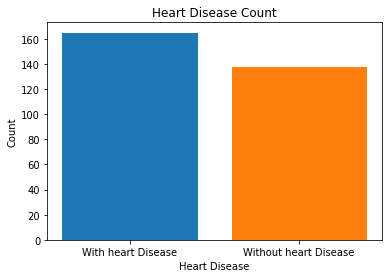

In [5]:
dataset = pd.read_csv('heart disease classification dataset.csv')
dataset.head()

# Get rid of Unnamed: 
dataset.drop(dataset.columns[0], axis=1, inplace=True)
dataset.head()

# Data Analysis
dataset.info()
dataset.target.value_counts() # yes[0] = 165 | no[1] = 138
with_heart_disease = dataset.target.value_counts()[0]
without_heart_disease = dataset.target.value_counts()[1]
print('With Heart Disease: ', with_heart_disease)
print('Without Heart Disease: ', without_heart_disease)

# Plotting Data with matplotlib
plt.bar(['With heart Disease'], [with_heart_disease])
plt.bar(['Without heart Disease'], [without_heart_disease])
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Heart Disease Count')
plt.show()


# Data Preprocessing

In [6]:
# Handling Null values
dataset.isnull().sum()

dataset = dataset.dropna(axis=0, subset=['trestbps', 'chol', 'thalach']) # dropna() function is used to remove rows and columns
                                                                         # with Null values
dataset.isnull().sum()

# Encoding categorical features 
# For target:
dataset['target'].unique()
dataset['target']=dataset['target'].map({'yes':1,'no':0}) # 1 = suffering from heart disease, 0 = not suffering from heart disease
dataset.head()

# For sex/gender:
dataset['sex'].unique()
dataset['sex']=dataset['sex'].map({'male':1, 'female':0})
dataset.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1


# Standardize the variables 

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(dataset.drop(['target'], axis = 1))


scaled_features= scaler.transform(dataset.drop(['target'], axis = 1))
dataset_feat=pd.DataFrame(scaled_features,columns=dataset.columns[:-1])
dataset_feat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.943873,0.671189,1.972299,0.755666,-0.256782,2.411214,-0.985767,0.005286,-0.70349,1.063670,-2.253628,-0.710411,-2.157203
1,-1.892586,0.671189,1.002696,-0.095257,0.074487,-0.414729,0.914428,1.642464,-0.70349,2.088291,-2.253628,-0.710411,-0.523972
2,-1.456208,-1.489893,0.033092,-0.095257,-0.821889,-0.414729,-0.985767,0.978743,-0.70349,0.295205,0.983200,-0.710411,-0.523972
3,0.180211,0.671189,0.033092,-0.662539,-0.198323,-0.414729,0.914428,1.244231,-0.70349,-0.217105,0.983200,-0.710411,-0.523972
4,0.289305,0.671189,-0.936511,0.472025,-1.055726,-0.414729,0.914428,-0.083211,-0.70349,-0.558645,-0.635214,-0.710411,-2.157203


# Pair Plot

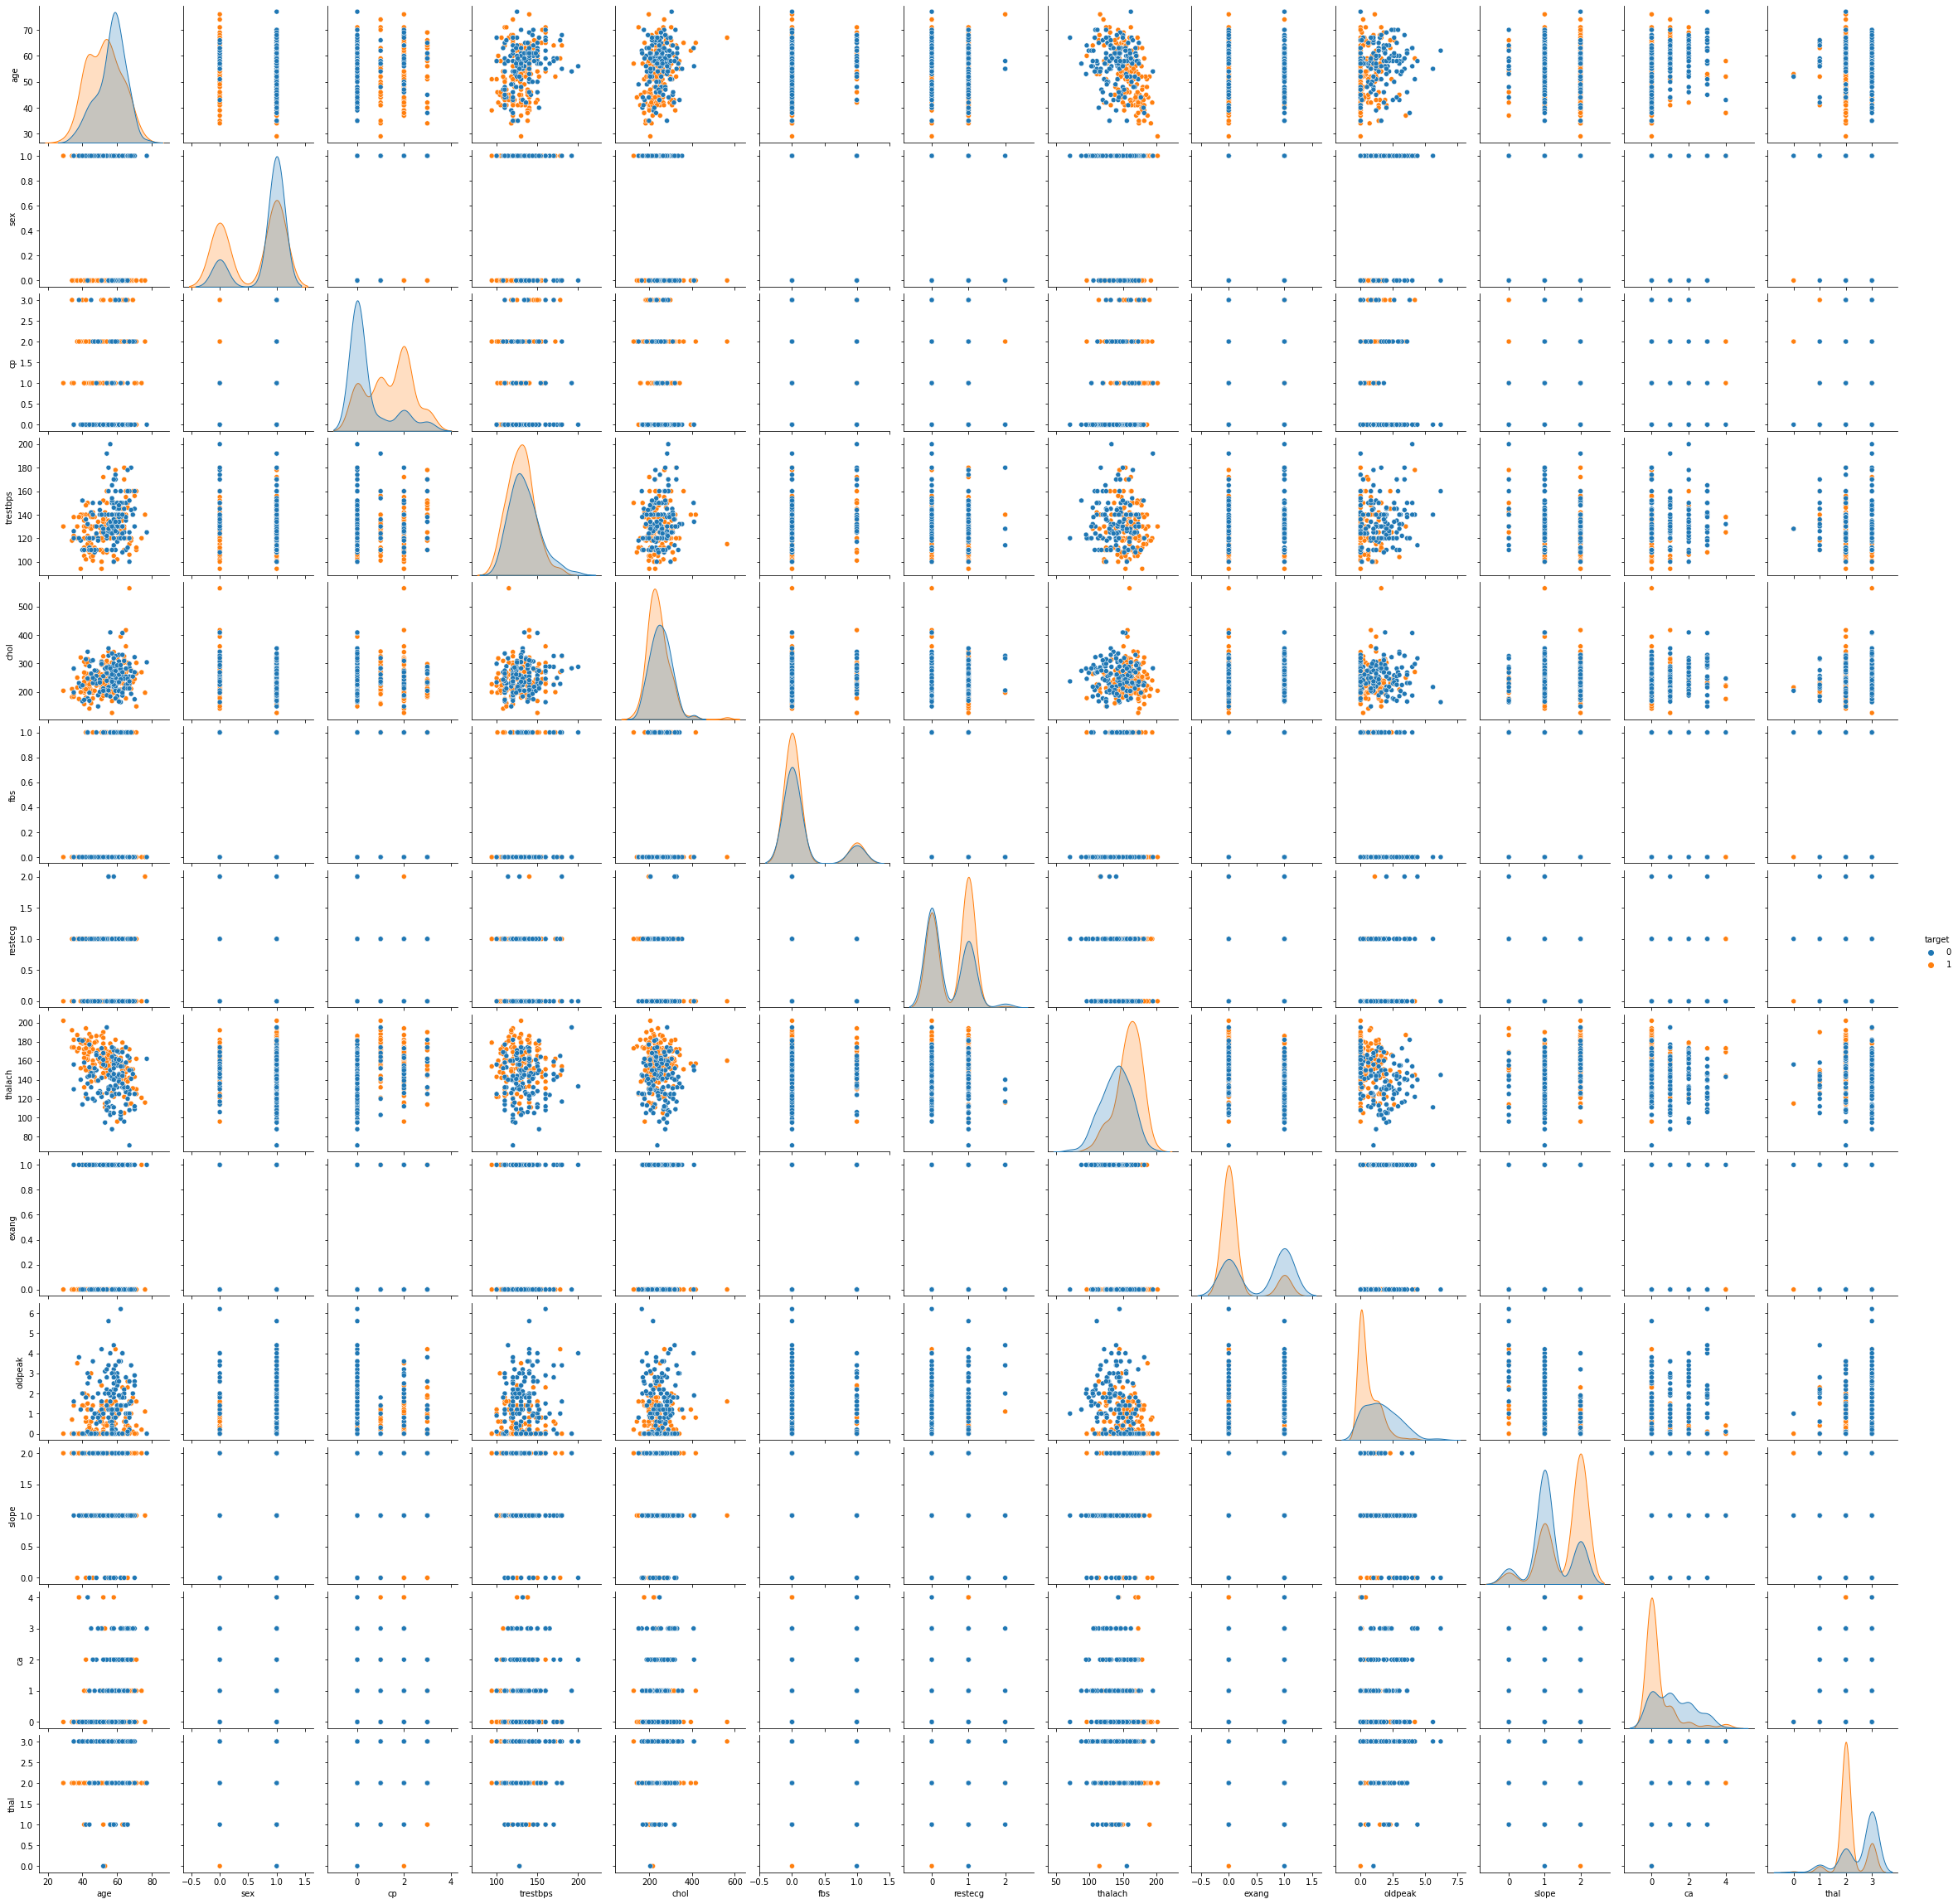

In [8]:
sns.pairplot(dataset, hue="target")

# Splitting the data into training data and testing data

In [9]:
y = dataset.target.values
x = dataset.drop(['target'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(234, 13)
(234,)
(59, 13)
(59,)


# Model Training

In [10]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(x_train, y_train) 
logistic_predictions =logistic_regression_model.predict(x_test)
logistic_regression_accuracy=accuracy_score(y_test, logistic_predictions)*100


print('Logistic Regression Testing Accuracy: ',logistic_regression_accuracy)


Logistic Regression Testing Accuracy:  83.05084745762711
